# _Analyses_

First I will set up my workspace and view the data.
It looks right, I have the packages I need

In [2]:
#Set up
library(ggplot2)
library(dplyr)
dat= read.csv('bees_clean.csv', header=T)
print(dat)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




     Farm Patch_No Year Bees BeeSp Flowers FlowerSp Shelter PCSemi_Nat
1   E4.11       P1 2007   20     3    1408        6     6.0       14.8
2   E4.11       P2 2007   20     2     422        6     6.0       14.8
3   E4.11       P3 2007    0     0       2        1     3.0       14.8
4   E4.11       P1 2008    5     2      30        3     6.0       14.8
5   E4.11       P2 2008    0     0       1        0     6.0       14.8
6   E4.11       P3 2008    0     0       1        0     3.0       14.8
7   E4.12       P1 2007    4     3     161        4     1.5        7.7
8   E4.12       P2 2007    0     0       2        1     0.0        7.7
9   E4.12       P3 2007    0     0       1        0     0.0        7.7
10  E4.12       P1 2008    3     2      16        4     1.5        7.7
11  E4.12       P2 2008   11     3      55        3     0.0        7.7
12  E4.12       P3 2008    8     3      89        2     0.0        7.7
13  E4.13       P2 2007    2     2     625        7     0.0       26.4
14  E4

## Linear Model
I will run bee abundance first. 

### Bee Abundace Results

Within the model, Flowers (p=0.00094), the number of flower species (p=0.00337) are positively correlated with bee abundance, and the amount of semi-natural habitat (p=0.02334) is negatively  correlated with bee abundance. 
The data only explains 24% of the change in bee abundance, the F statistic is significant. 

From the plots, the data is resonably normal, but the Residuals vs. Fitted and Scale-Location is somewhat U shape, suggesting a better fit for a non-linear model. There are no points with significant leverage.



Call:
lm(formula = Bees_log ~ Flowers + FlowerSp + Shelter + PCSemi_Nat, 
    data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6482 -0.8710  0.0501  0.9105  2.6002 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.1248193  0.3749118   3.000  0.00338 ** 
Flowers      0.0010024  0.0002944   3.405  0.00094 ***
FlowerSp     0.1472804  0.0490857   3.000  0.00337 ** 
Shelter      0.1115234  0.0702176   1.588  0.11526    
PCSemi_Nat  -0.0499668  0.0217084  -2.302  0.02334 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.258 on 104 degrees of freedom
Multiple R-squared:  0.2722,	Adjusted R-squared:  0.2442 
F-statistic: 9.723 on 4 and 104 DF,  p-value: 0.000001014


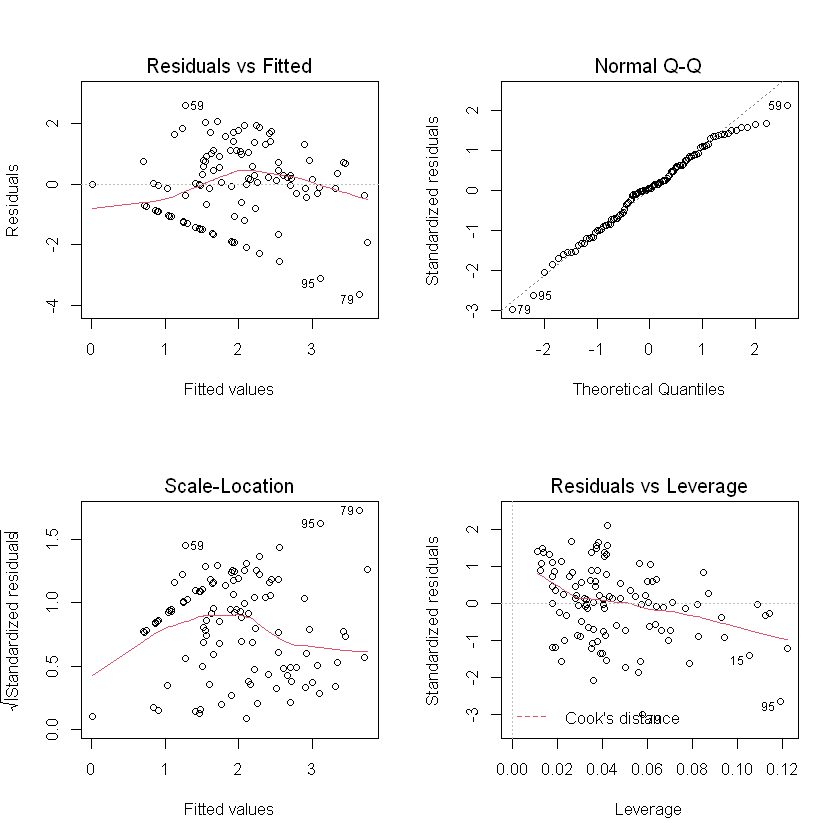

In [27]:
#Bee abundance 
bee_glm= lm(Bees_log~ Flowers+ FlowerSp + Shelter+ PCSemi_Nat, data=dat)
summary(bee_glm)
par(mfrow=c(2,2))
plot(bee_glm)

#Results
#flowers, flower species, semi-natural significnat
#f= 9.723 on 4 and 104 DF
#R^2= 0.2442 

### Bee Diversity Results

Within the model, Flowers (p=0.01813), the number of flower species (p=0.00258) and the amount of shelter (p=0.02160) are positively correlated with bee diversity.
The data only explains 20% of the change in bee abundance, the F statistic is significant. 

From the plots, the data is resonably normal, but the Residuals vs. Fitted and Scale-Location are reasonably horizontal suggesting reasonable normality. There are no points with significant leverage.


Call:
lm(formula = BeeSp ~ Flowers + FlowerSp + Shelter + PCSemi_Nat, 
    data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1911 -0.9091 -0.1603  0.9319  3.2044 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.6251389  0.3760323   1.662  0.09943 . 
Flowers      0.0007088  0.0002952   2.401  0.01813 * 
FlowerSp     0.1520470  0.0492324   3.088  0.00258 **
Shelter      0.1642735  0.0704274   2.333  0.02160 * 
PCSemi_Nat  -0.0239778  0.0217733  -1.101  0.27333   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.261 on 104 degrees of freedom
Multiple R-squared:  0.2322,	Adjusted R-squared:  0.2027 
F-statistic: 7.864 on 4 and 104 DF,  p-value: 0.00001408


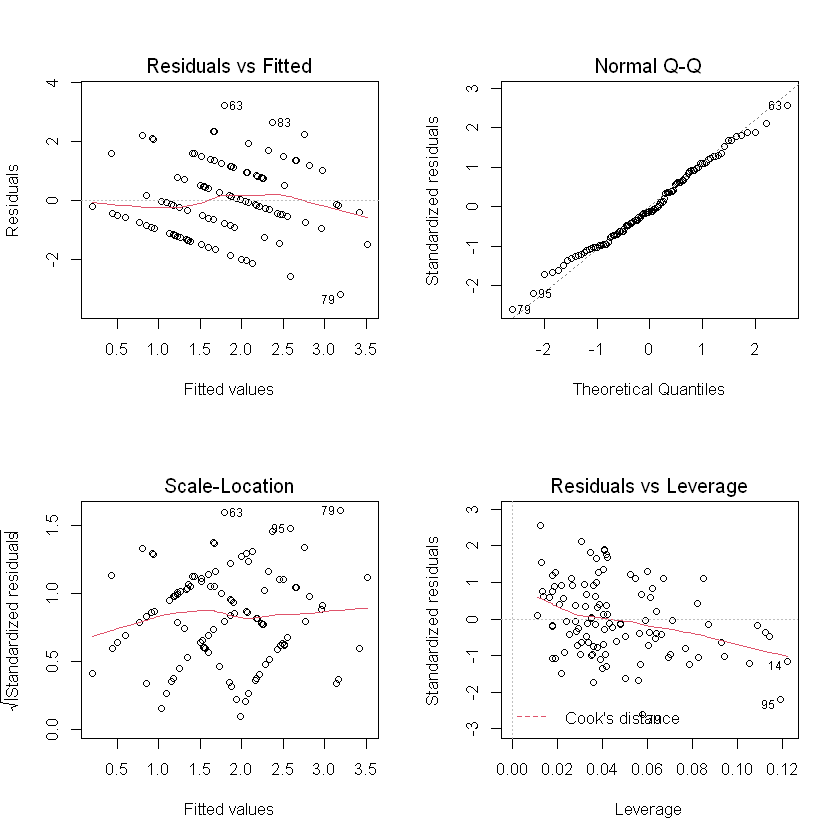

In [28]:
#Bee diversity
bee_sp_glm= lm(BeeSp~ Flowers+ FlowerSp + Shelter+ PCSemi_Nat, data=dat)
summary(bee_sp_glm)
par(mfrow=c(2,2))
plot(bee_sp_glm)

## Summary

Flower species and number of flowers have a positive influence on bee abundance and diversity. Shelter has a postiive influence on bee diversity. Surprisingly, the amount of semi natural habitat has a negative influence on bee abundance, however this may be because bees prefer these habitats vs. the patches, and are therefore less abundant on the patches where the survey occured therefore this is likely not to represent fewer bees on the farm as much as habitat preference. 




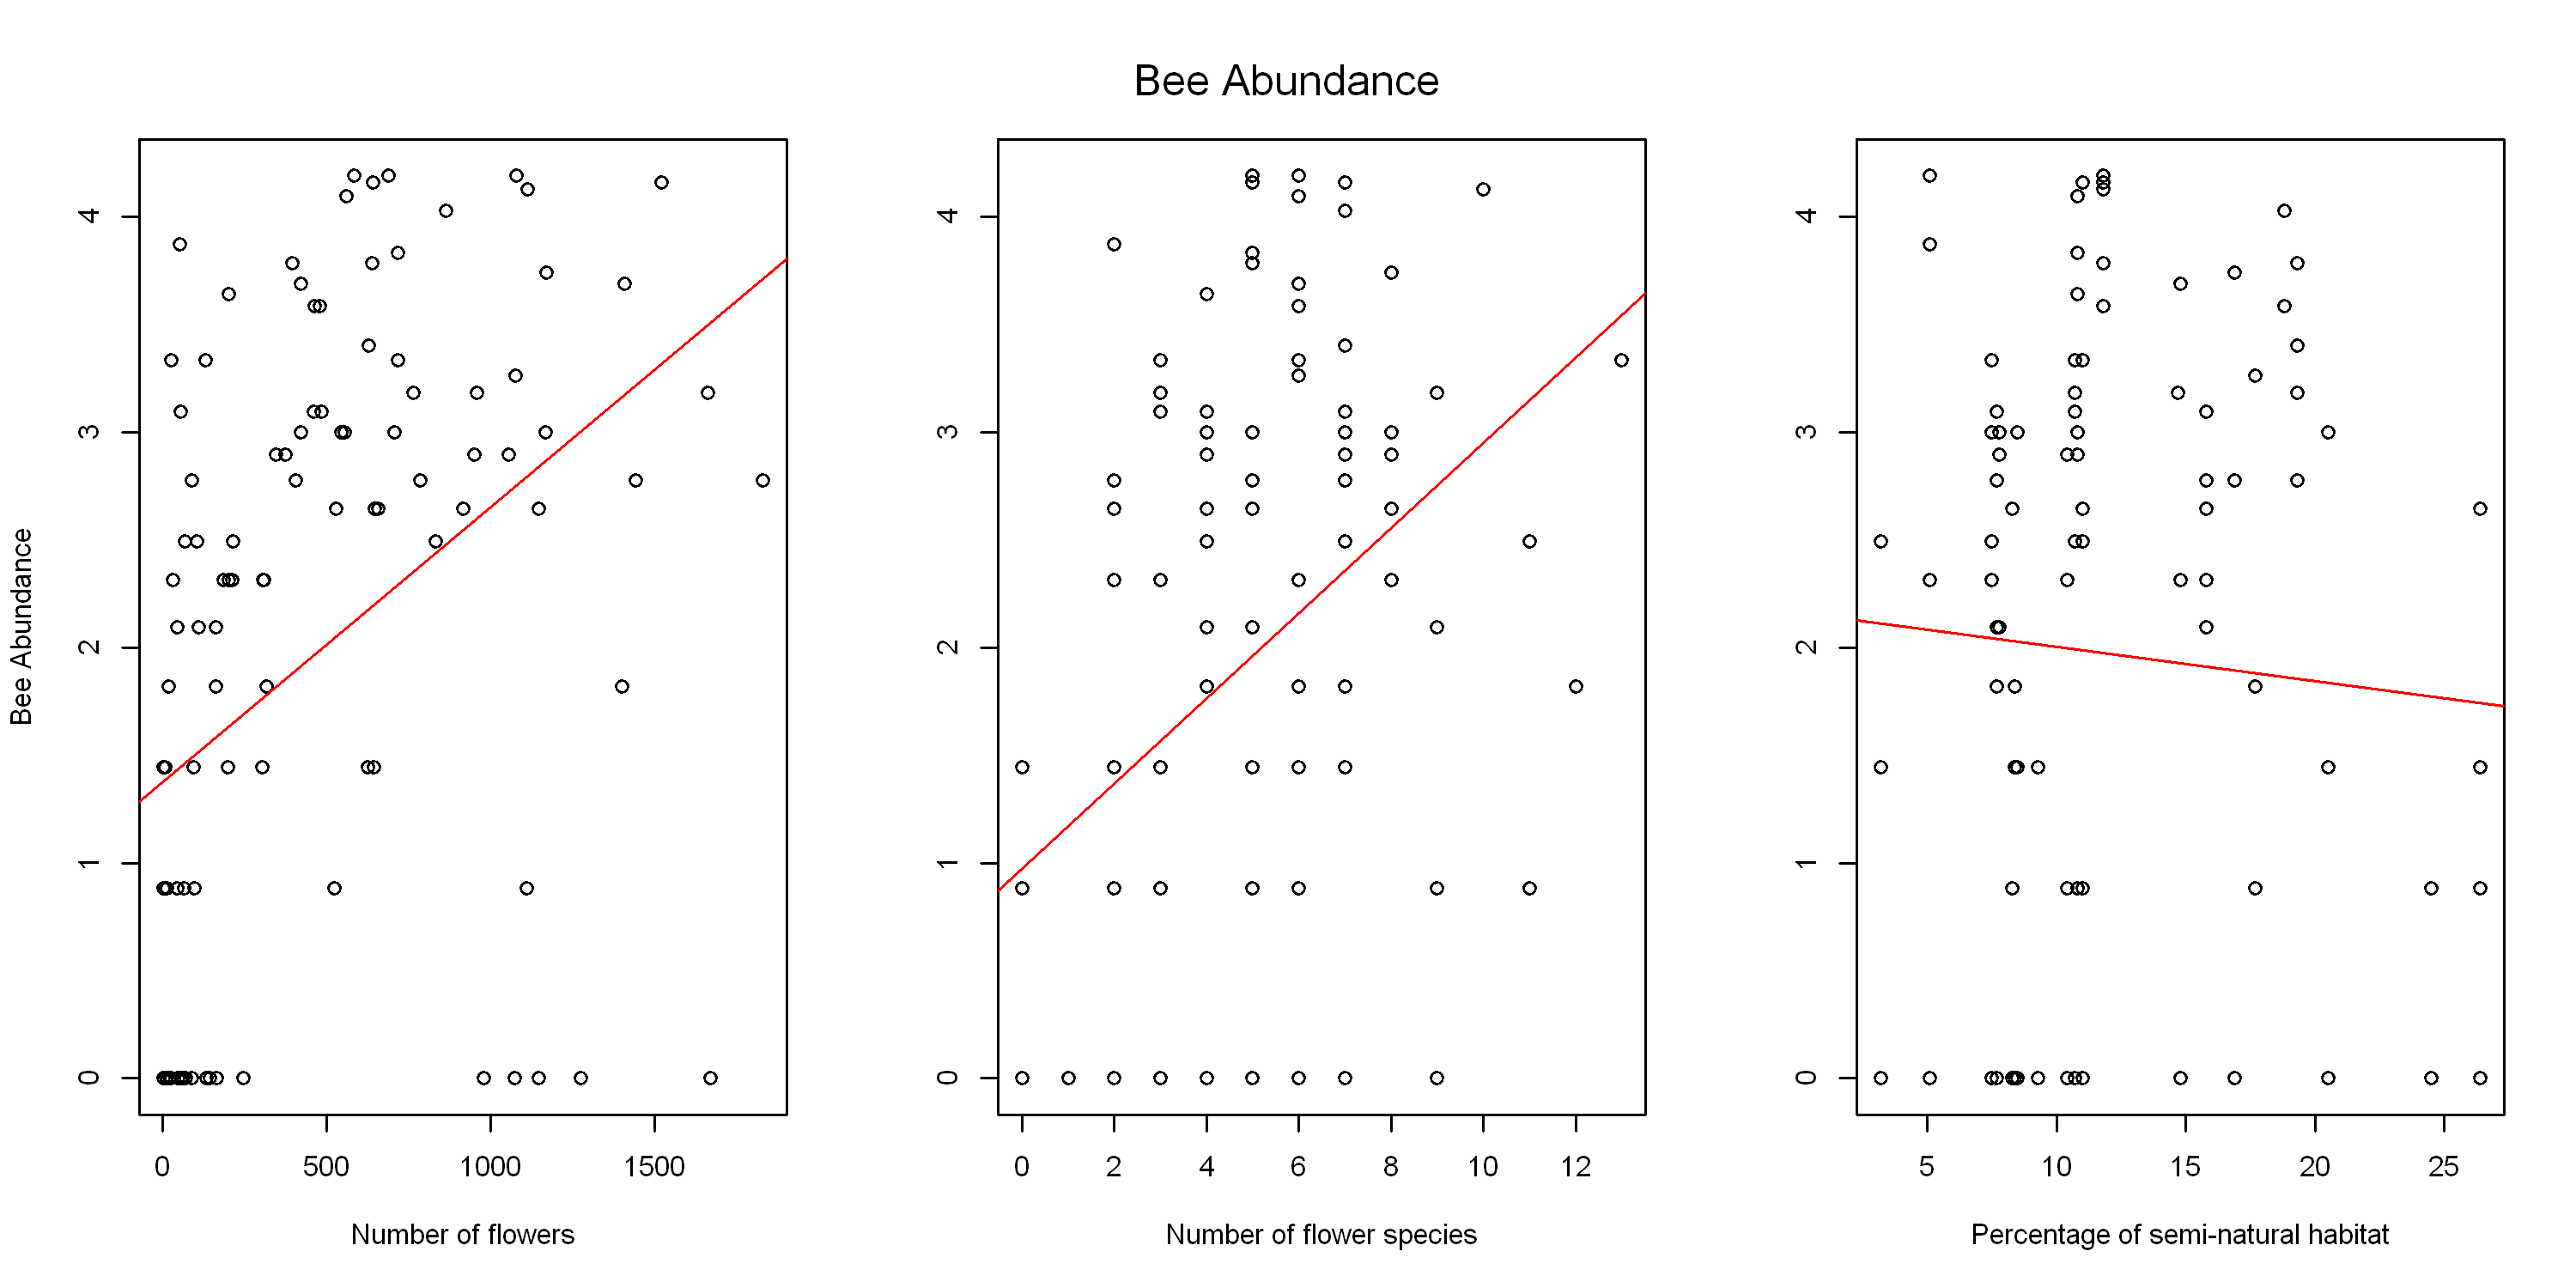

In [56]:
#Abundance
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)
par(mfrow= c(1,3))
plot(dat$Flowers, dat$Bees_log, xlab= "Number of flowers", ylab= "Bee Abundance")
abline(lm(Bees_log ~Flowers, data=dat), col="red")
plot(dat$FlowerSp, dat$Bees_log, , xlab= "Number of flower species", ylab="")
abline(lm(Bees_log ~FlowerSp, data=dat), col="red")
plot(dat$PCSemi_Nat, dat$Bees_log,  , xlab= "Percentage of semi-natural habitat", ylab= "")
abline(lm(Bees_log ~PCSemi_Nat, data=dat), col="red")
mtext("Bee Abundance", side = 3, line = -3, outer = TRUE)

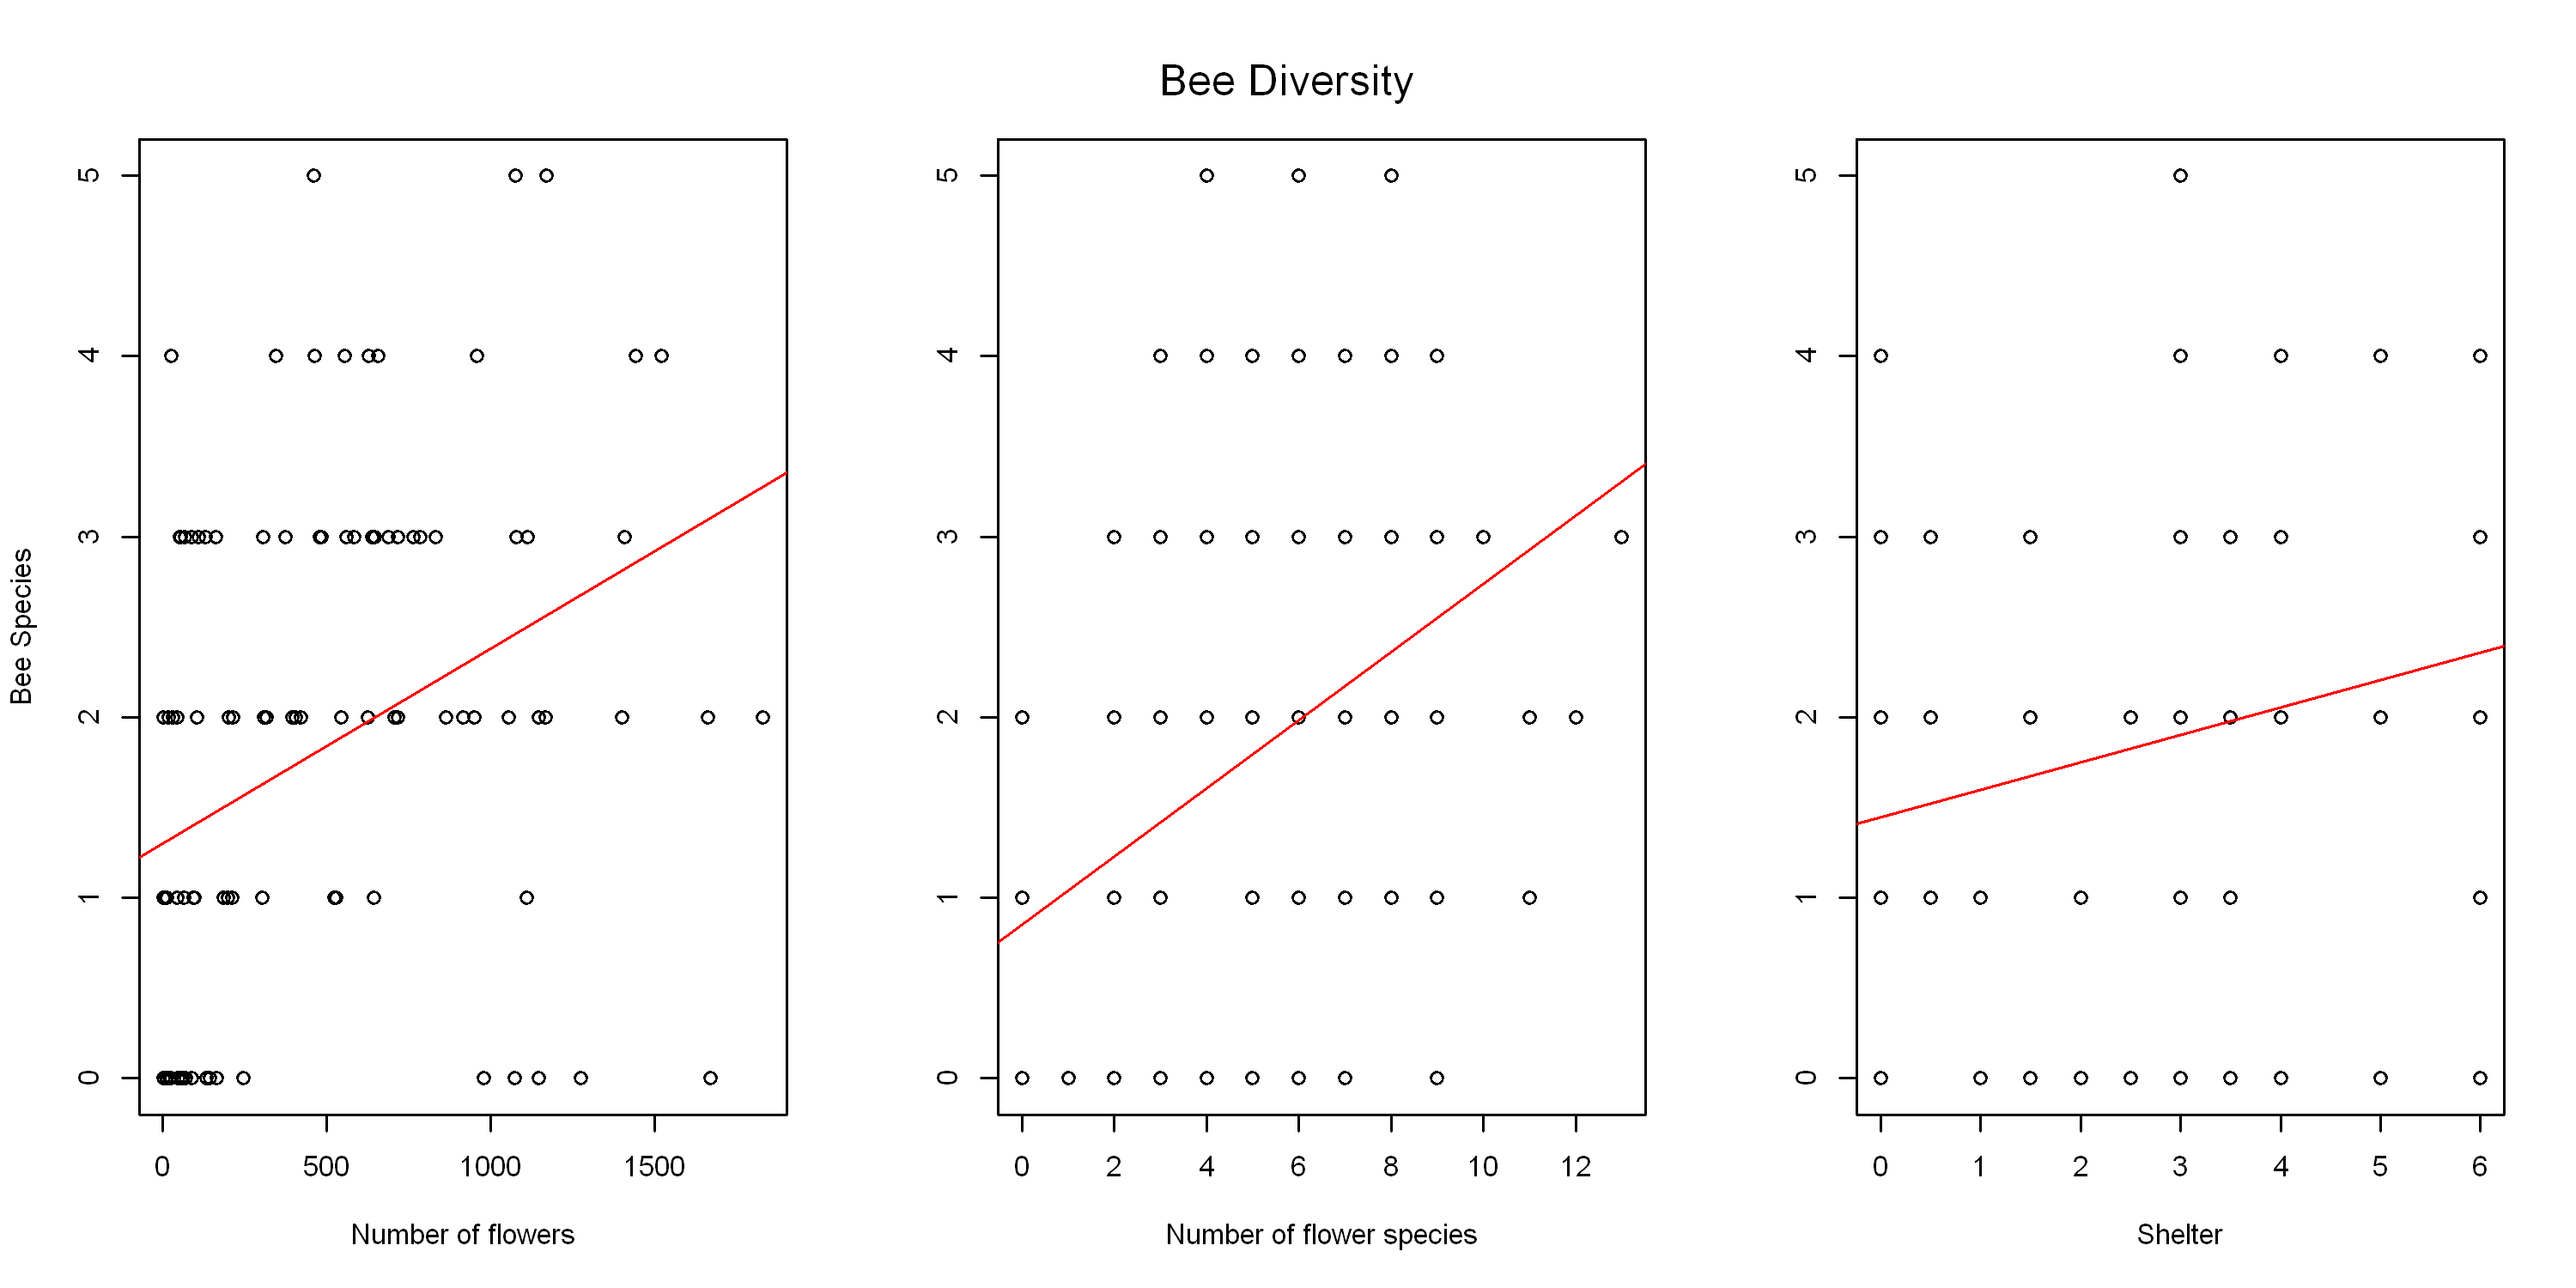

In [57]:
#Diversity
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)
par(mfrow= c(1,3))
plot(dat$Flowers, dat$BeeSp, xlab= "Number of flowers", ylab= "Bee Species")
abline(lm(BeeSp ~Flowers, data=dat), col="red")
plot(dat$FlowerSp, dat$BeeSp, , xlab= "Number of flower species", ylab="")
abline(lm(BeeSp ~FlowerSp, data=dat), col="red")
plot(dat$Shelter, dat$BeeSp,  , xlab= "Shelter", ylab= "")
abline(lm(BeeSp ~ Shelter, data=dat), col="red")
mtext("Bee Diversity", side = 3, line = -3, outer = TRUE)